In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

%matplotlib inline
sns.set(rc={'figure.figsize': [20, 20]}, font_scale=1.4)

/home/yongjie/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/yongjie/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
df = pd.read_csv("hypothyroid.csv")
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [3]:
df.describe().T

,count,unique,top,freq
age,3772,94,59,95
sex,3772,3,F,2480
on thyroxine,3772,2,f,3308
query on thyroxine,3772,2,f,3722
on antithyroid medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid surgery,3772,2,f,3719
I131 treatment,3772,2,f,3713
query hypothyroid,3772,2,f,3538


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [5]:
df["binaryClass"]=df["binaryClass"].map({"P":0,"N":1})
df=df.replace({"F":1,"M":0})

In [6]:
df["pregnant"].value_counts()

f    3719
t      53
Name: pregnant, dtype: int64

In [7]:
df=df.replace({"t":1,"f":0})

In [8]:
df=df.replace({"?":np.NAN})

In [9]:
df.isnull().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [10]:
df.drop(['T3 measured','TSH measured','TT4 measured','T4U measured','FTI measured','TBG measured','TBG','referral source','on thyroxine','query on thyroxine','on antithyroid medication','query hypothyroid', 'query hyperthyroid','hypopituitary', 'psych'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3771 non-null   object 
 1   sex              3622 non-null   float64
 2   sick             3772 non-null   int64  
 3   pregnant         3772 non-null   int64  
 4   thyroid surgery  3772 non-null   int64  
 5   I131 treatment   3772 non-null   int64  
 6   lithium          3772 non-null   int64  
 7   goitre           3772 non-null   int64  
 8   tumor            3772 non-null   int64  
 9   TSH              3403 non-null   object 
 10  T3               3003 non-null   object 
 11  TT4              3541 non-null   object 
 12  T4U              3385 non-null   object 
 13  FTI              3387 non-null   object 
 14  binaryClass      3772 non-null   int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 442.2+ KB


In [12]:
cols = ['age','FTI','TSH','T3','TT4','T4U']
for i in cols:
    df[i] = pd.to_numeric(df[i])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3771 non-null   float64
 1   sex              3622 non-null   float64
 2   sick             3772 non-null   int64  
 3   pregnant         3772 non-null   int64  
 4   thyroid surgery  3772 non-null   int64  
 5   I131 treatment   3772 non-null   int64  
 6   lithium          3772 non-null   int64  
 7   goitre           3772 non-null   int64  
 8   tumor            3772 non-null   int64  
 9   TSH              3403 non-null   float64
 10  T3               3003 non-null   float64
 11  TT4              3541 non-null   float64
 12  T4U              3385 non-null   float64
 13  FTI              3387 non-null   float64
 14  binaryClass      3772 non-null   int64  
dtypes: float64(7), int64(8)
memory usage: 442.2 KB


In [14]:
df.isnull().sum()

age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
binaryClass          0
dtype: int64

In [15]:
miss_cols = ['sex', 'FTI','TSH','T3','TT4','T4U']
for i in miss_cols:
    df[i] = df[i].fillna(df[i].mean())

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
I131 treatment     0
lithium            0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
binaryClass        0
dtype: int64

In [18]:
miss_cols.extend(['age', 'binaryClass'])

In [19]:
df = df[miss_cols]

In [20]:
df_corr = df.corr()
df_corr

,sex,FTI,TSH,T3,TT4,T4U,age,binaryClass
sex,1.000000,0.038332,0.031846,0.062895,0.166940,0.225786,0.003606,0.050865
FTI,0.038332,1.000000,-0.293016,0.309119,0.779143,-0.173771,0.050026,-0.313761
TSH,0.031846,-0.293016,1.000000,-0.147377,-0.261288,0.070989,-0.056167,0.423950
T3,0.062895,0.309119,-0.147377,1.000000,0.509168,0.407141,-0.214938,-0.177750
TT4,0.166940,0.779143,-0.261288,0.509168,1.000000,0.426626,-0.037610,-0.291658
T4U,0.225786,-0.173771,0.070989,0.407141,0.426626,1.000000,-0.157542,0.028269
age,0.003606,0.050026,-0.056167,-0.214938,-0.037610,-0.157542,1.000000,-0.003174
binaryClass,0.050865,-0.313761,0.423950,-0.177750,-0.291658,0.028269,-0.003174,1.000000


<AxesSubplot:>

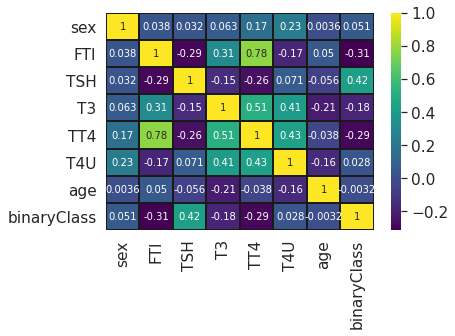

In [21]:
sns.heatmap(df_corr, cmap='viridis', linecolor='k', linewidths=1, annot=True)

In [22]:
npdata = df.to_numpy()
X, y = npdata[:, 0:7], npdata[:,7:8]

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [24]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
df.head()

,sex,FTI,TSH,T3,TT4,T4U,age,binaryClass
0,1.0,109.000000,1.30,2.5000,125.0,1.140,41.0,0
1,1.0,110.469649,4.10,2.0000,102.0,0.995,23.0,0
2,0.0,120.000000,0.98,2.0135,109.0,0.910,46.0,0
3,1.0,110.469649,0.16,1.9000,175.0,0.995,70.0,0
4,1.0,70.000000,0.72,1.2000,61.0,0.870,70.0,0


In [26]:
models = {
    LogisticRegression(max_iter=500):'Logistic Regression',
    SVC():"Support Vector Machine",
    RandomForestClassifier():'Random Forest'
}
for m in models.keys():
    m.fit(X_train, y_train)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

/home/yongjie/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/yongjie/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/yongjie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy Score for Logistic Regression is :  93.50993377483444 %
Accuracy Score for Support Vector Machine is :  93.90728476821192 %
Accuracy Score for Random Forest is :  98.41059602649007 %


In [27]:
print(X, y)

[[  1.         109.           1.3        ... 125.           1.14
   41.        ]
 [  1.         110.46964866   4.1        ... 102.           0.9949997
   23.        ]
 [  0.         120.           0.98       ... 109.           0.91
   46.        ]
 ...
 [  1.         105.           5.1        ... 112.           1.07
   74.        ]
 [  0.          87.           0.7        ...  82.           0.94
   72.        ]
 [  1.          92.           1.         ...  99.           1.07
   64.        ]] [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [28]:
for model,name in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}")  
    print("----------------------------------------------------------")
    print(classification_report(y_test,y_pred))
    print("----------------------------------------------------------")

Classification Report for Logistic Regression
----------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97       699
         1.0       1.00      0.12      0.22        56

    accuracy                           0.94       755
   macro avg       0.97      0.56      0.59       755
weighted avg       0.94      0.94      0.91       755

----------------------------------------------------------
Classification Report for Support Vector Machine
----------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       699
         1.0       1.00      0.18      0.30        56

    accuracy                           0.94       755
   macro avg       0.97      0.59      0.64       755
weighted avg       0.94      0.94      0.92       755

----------------------------------------------------------
Classification 

In [29]:
%%time
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

/home/yongjie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


CPU times: user 290 ms, sys: 4.95 ms, total: 295 ms
Wall time: 293 ms


0.9827814569536424

In [ ]:
print(df.columns.to_list()[0:-1])

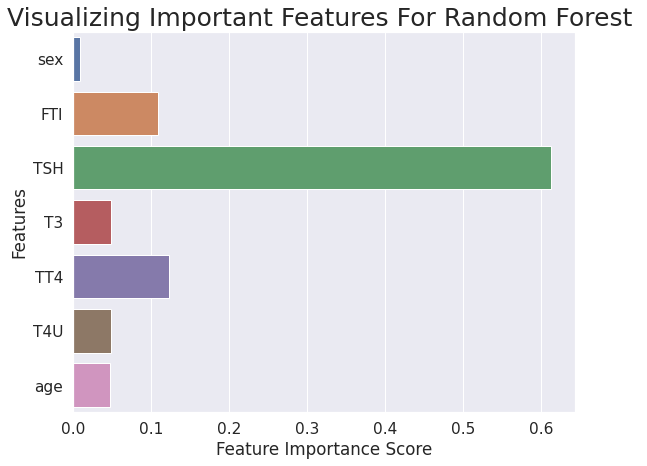

In [31]:
plt.figure(figsize=(9,7))
feature_imp1 = rf.feature_importances_
sns.barplot(x=feature_imp1, y=df.columns.to_list()[0:-1])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features For Random Forest ",{'fontsize':25})
plt.show();

In [ ]:
df.columns

Classification Report for Logistic Regression
----------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       697
         1.0       0.83      0.09      0.16        58

    accuracy                           0.93       755
   macro avg       0.88      0.54      0.56       755
weighted avg       0.92      0.93      0.90       755

----------------------------------------------------------
Classification Report for Support Vector Machine
----------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       697
         1.0       0.91      0.34      0.50        58

    accuracy                           0.95       755
   macro avg       0.93      0.67      0.74       755
weighted avg       0.95      0.95      0.94       755

----------------------------------------------------------
Classification Report for Random Forest
----------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       697
         1.0       0.83      0.93      0.88        58

    accuracy                           0.98       755
   macro avg       0.91      0.96      0.93       755
weighted avg       0.98      0.98      0.98       755

----------------------------------------------------------